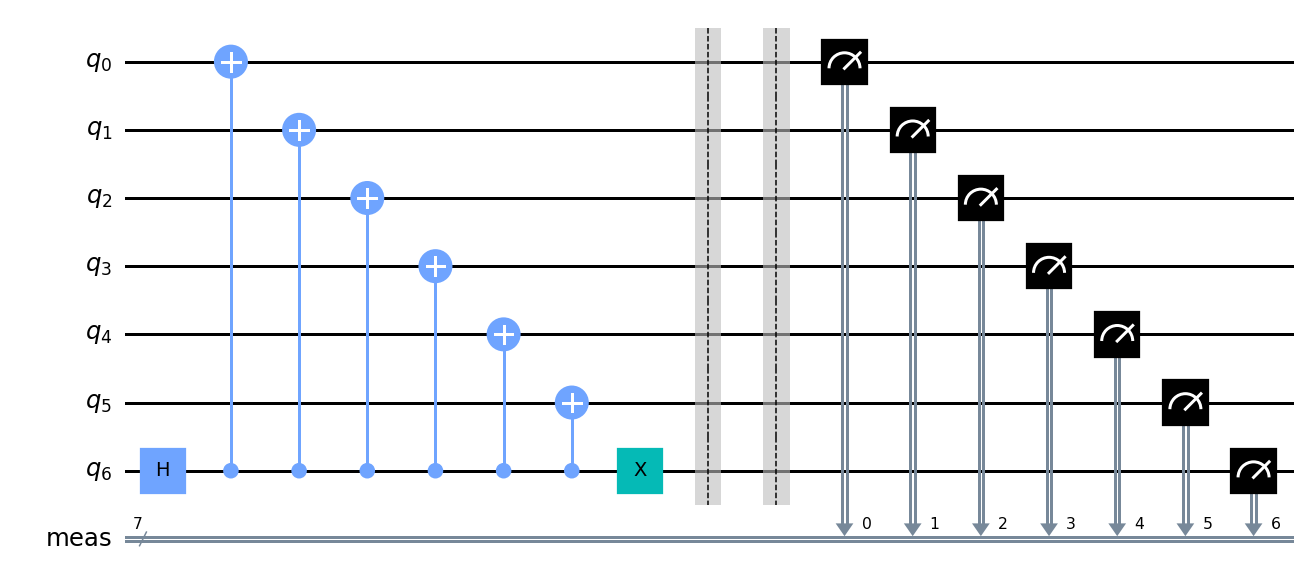

<IPython.core.display.Latex object>

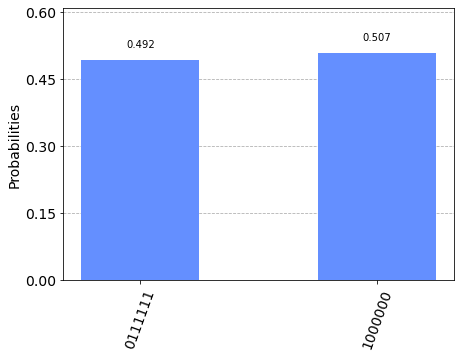

In [12]:
# quantum_circuit2.ipynb

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import (
    Aer,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    assemble,
    execute,
)
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(7) #initialize quantum circuit with seven qubits, by default both are
#initialized to 0 state

qc.h(6) #put the first qubit through a hadamard

for bit in range(6): #qubits 0 through 5 with have a cx put on them with q6 as control
    qc.cx(6, bit)

qc.x(6) #invert q6 at the end to get the desired output. Turns out you only need one
# x gate.

qc.save_statevector()

qc.measure_all() #measuring all qubits

result = execute(qc, backend, shots=10_000).result()
counts = result.get_counts()

sv = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv, prefix="\\text{Statevector} = "))

plot_histogram(counts) 

In [47]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

A = Operator([[(1 / np.sqrt(2)), (1 / np.sqrt(2))],[(1 / np.sqrt(2)), -(1 / np.sqrt(2))]])
B = Operator([[1, 0],[0, 1]])
H2 = A.tensor(B)
H3 = H2.tensor(B)
H4 = H3.tensor(B)
H5 = H4.tensor(B)
H6 = H5.tensor(B)

H6

#I was going to try getting the desired output by putting qubits q0 through q5 through
# a big hadamard (H tensor I, 6 times). Then use a cx on the last qubit, with the control
#being on one of the qubits that went through the hadamard. I was able to get the 
#operator I needed, but I couldn't put in into a qiskit circuit. 

Operator([[ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
           -0.        +0.j],
          [ 0.        +0.j,  0.70710678+0.j, -0.        +0.j,
           -0.70710678+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))